# Get The STNG Data Set

In the notebook **startrekng-episodes-analysis_01.ipynb**, I worked my way through some raw data and finally got this data set about the star trek next generation episodes, form which I hope it is 99% OK. 

Source of the raw data was actually http://www.chakoteya.net/NextGen/ - Thanks a lot for transcribing all the episodes! I hope you like what I get out of the your data!




In [4]:
import pandas as pd
cLinesDf = pd.read_pickle("cLinesDf_01_aftercleaning")

No let's see, what's in the set and what we can do with it.

In [5]:
cLinesDf.head()

,epsIdx,line,epsName,epsLineIdx,OC,on monitor,telepath
character,,,,,,,
PICARD,1,"You will agree, Data, that Starfleet's orders...",Encounter at Farpoint,3,False,False,False
DATA,1,Difficult? Simply solve the mystery of Farpoi...,Encounter at Farpoint,4,False,False,False
PICARD,1,As simple as that.,Encounter at Farpoint,5,False,False,False
TROI,1,Farpoint Station. Even the name sounds myster...,Encounter at Farpoint,6,False,False,False
PICARD,1,"It's hardly simple, Data, to negotiate a frie...",Encounter at Farpoint,7,False,False,False


The data set contains (almost) every spoken line, of every character in all the 176 episodes.

Now that we have the data pretty clean, let's ask some questions. 

For example:
Who has the most spoken lines?

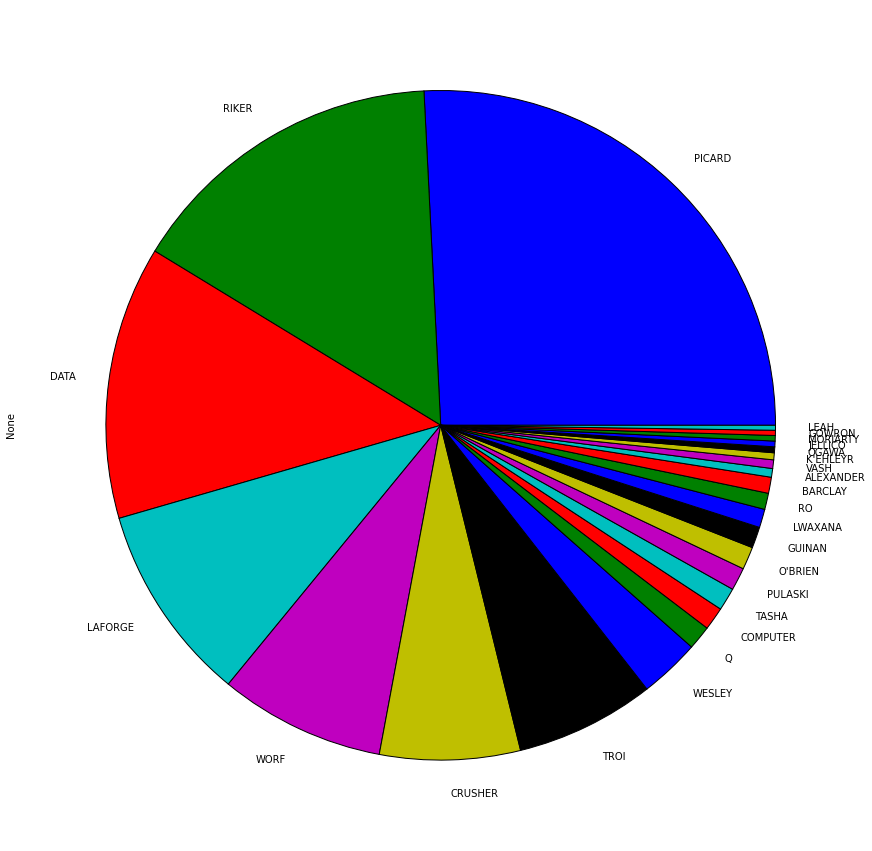

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

cLineNumber = cLinesDf.groupby(cLinesDf.index).size().order(ascending=False)
# the biggest 25:
cLineNumber[:25].plot(kind="pie", figsize=(15,15))

obviously PICARD has a lot to say! 

In [67]:
cLineNumber[:25]

character
PICARD       12328
RIKER         7405
DATA          6304
LAFORGE       4579
WORF          3822
CRUSHER       3238
TROI          3214
WESLEY        1396
Q              555
COMPUTER       530
TASHA          527
PULASKI        525
O'BRIEN        523
GUINAN         487
LWAXANA        426
RO             374
BARCLAY        371
ALEXANDER      200
VASH           199
K'EHLEYR       161
OGAWA          136
JELLICO        131
MORIARTY       127
GOWRON         119
LEAH           113
dtype: int64


Because we only plot the first 25, it looks that he talks a quarter of all words available.
but let's plot the proportions.

via `apply()` we can excecute a `lambda` on every value and get a new Series-object:

character
PICARD       0.194230
RIKER        0.116667
DATA         0.099321
LAFORGE      0.072143
WORF         0.060216
CRUSHER      0.051015
TROI         0.050637
WESLEY       0.021994
Q            0.008744
COMPUTER     0.008350
TASHA        0.008303
PULASKI      0.008271
O'BRIEN      0.008240
GUINAN       0.007673
LWAXANA      0.006712
RO           0.005892
BARCLAY      0.005845
ALEXANDER    0.003151
VASH         0.003135
K'EHLEYR     0.002537
OGAWA        0.002143
JELLICO      0.002064
MORIARTY     0.002001
GOWRON       0.001875
LEAH         0.001780
dtype: float64

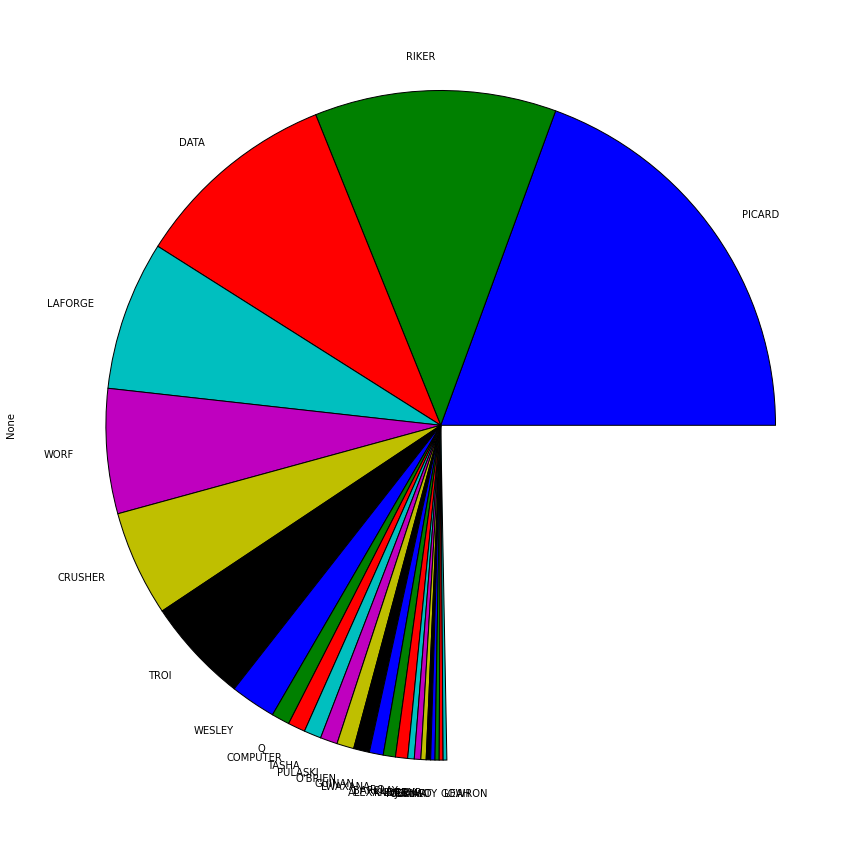

In [68]:
cLineNumberProp = cLineNumber.apply(lambda x : float(x)/cLineNumber.sum())
cLineNumberProp[:25].plot(kind="pie", figsize=(15,15))
cLineNumberProp[:25]

Now we see it is only about 20% - but still a lot in comparison.

And we see that the first 25 make up more than 75% of every spoken line in stng. (if values - like these proportions - do not add up to 1.0 or higher,  pyplot automatically draws a not full pie - nice feature)

If we want to know, how many characters it really takes to get to 75% we can use cumsum (the cummulated sum) and searchsorted to search for the index of a wanted value:


In [69]:
print cLineNumberProp.cumsum()[:30]
print "0.75 percent is reached at index", cLineNumberProp.cumsum().searchsorted(0.75)

character
PICARD       0.194230
RIKER        0.310898
DATA         0.410219
LAFORGE      0.482362
WORF         0.542579
CRUSHER      0.593594
TROI         0.644231
WESLEY       0.666226
Q            0.674970
COMPUTER     0.683320
TASHA        0.691623
PULASKI      0.699894
O'BRIEN      0.708134
GUINAN       0.715807
LWAXANA      0.722519
RO           0.728411
BARCLAY      0.734257
ALEXANDER    0.737408
VASH         0.740543
K'EHLEYR     0.743080
OGAWA        0.745222
JELLICO      0.747286
MORIARTY     0.749287
GOWRON       0.751162
LEAH         0.752942
LORE         0.754707
SOREN        0.756424
SCOTT        0.758126
SHELBY       0.759780
RASMUSSEN    0.761371
dtype: float64
0.75 percent is reached at index [23]


if we plot the cumsum as a curve (the default plot-kind) you can see that there is a reeeeeally long tail, with a lot of people who do not talk much.

[None, None, None, None, None, None, None, None, None, None]

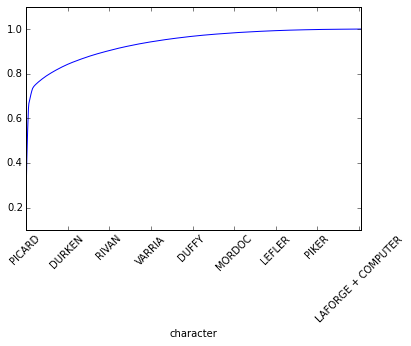

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


ax = cLineNumberProp.cumsum().plot()
plt.setp(ax.get_xticklabels(), rotation=45)


let's zoom in:

Wesley's DOT:  0.666225520316


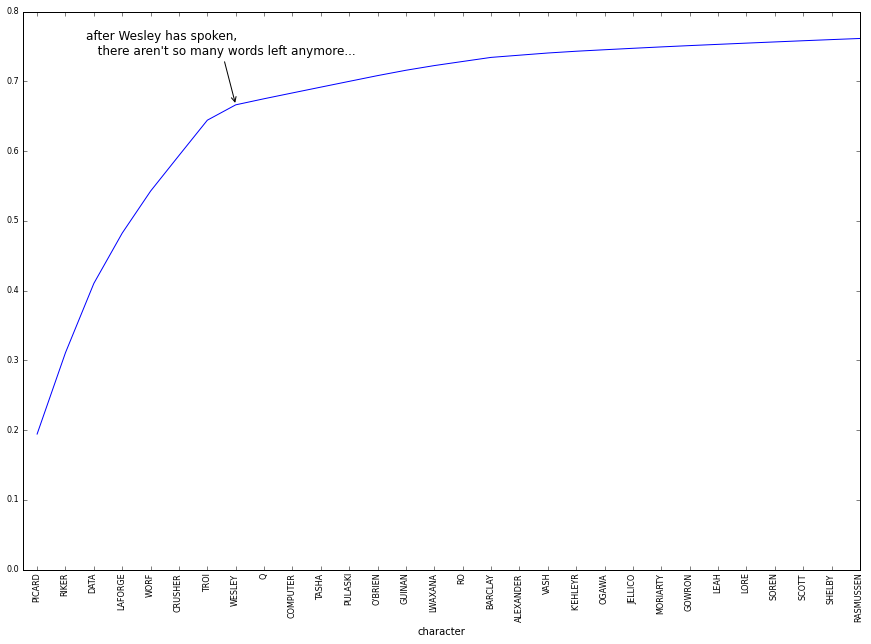

In [13]:
getTheFirst = 30
ax = cLineNumberProp.cumsum()[:getTheFirst].plot(figsize=(15,10))

plt.setp(ax.get_xticklabels(), rotation=90)

alltheLabels = cLineNumberProp.cumsum()[:getTheFirst].index.tolist()
# set WHERE the labels should appear pos=[0,1,2,3...,30] and WHAT labels to appear 
plt.xticks(range(len(alltheLabels)), 
                     alltheLabels)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xlim(-0.5)
plt.ylim(0)

plt.annotate("after Wesley has spoken, \n   there aren't so many words left anymore...",
         xy=(7, cLineNumberProp.cumsum()[7]), 
         xycoords='data',
         xytext=(-150, +50), 
         textcoords='offset points', 
         fontsize=12,
         arrowprops=dict(
            facecolor='red', 
            arrowstyle="->"))

print "Wesley's DOT: ", cLineNumberProp.cumsum()[7]

This is not tooo suprising - after all the first 7 characters appear in almost every episode, as far as I can remember.

But: do they?


In [14]:


maincrew = [ "PICARD",
            "RIKER",
            "DATA", 
           "LAFORGE",          
           "WORF",          
           "TROI",          
           "CRUSHER",        
           "WESLEY"]

# let's group by episodes and characters and  
#    get the size per group.
#    via unstack we can make level 1 (characters) of the index to columns
#    via fillna we set NaN Values to 0, if we want

whoWhere = cLinesDf.reset_index().groupby(["epsIdx","character"]).size().unstack("character")#.fillna(0)

# now we have the line count of every maincrew-character per episode:
whoWhere[maincrew]


character,PICARD,RIKER,DATA,LAFORGE,WORF,TROI,CRUSHER,WESLEY
epsIdx,,,,,,,,
1,184,116,60,15,31,45,35,20
2,83,53,37,19,16,14,41,33
3,94,34,31,21,NaN,23,13,3
4,99,73,48,35,12,8,5,NaN
5,112,57,14,18,4,5,9,19
6,75,51,40,32,16,24,37,16
7,95,33,35,11,15,15,25,19
8,104,84,29,17,5,16,38,10
9,71,69,18,25,10,NaN,7,5


let's get a little overview, of who has spoken in which episode:

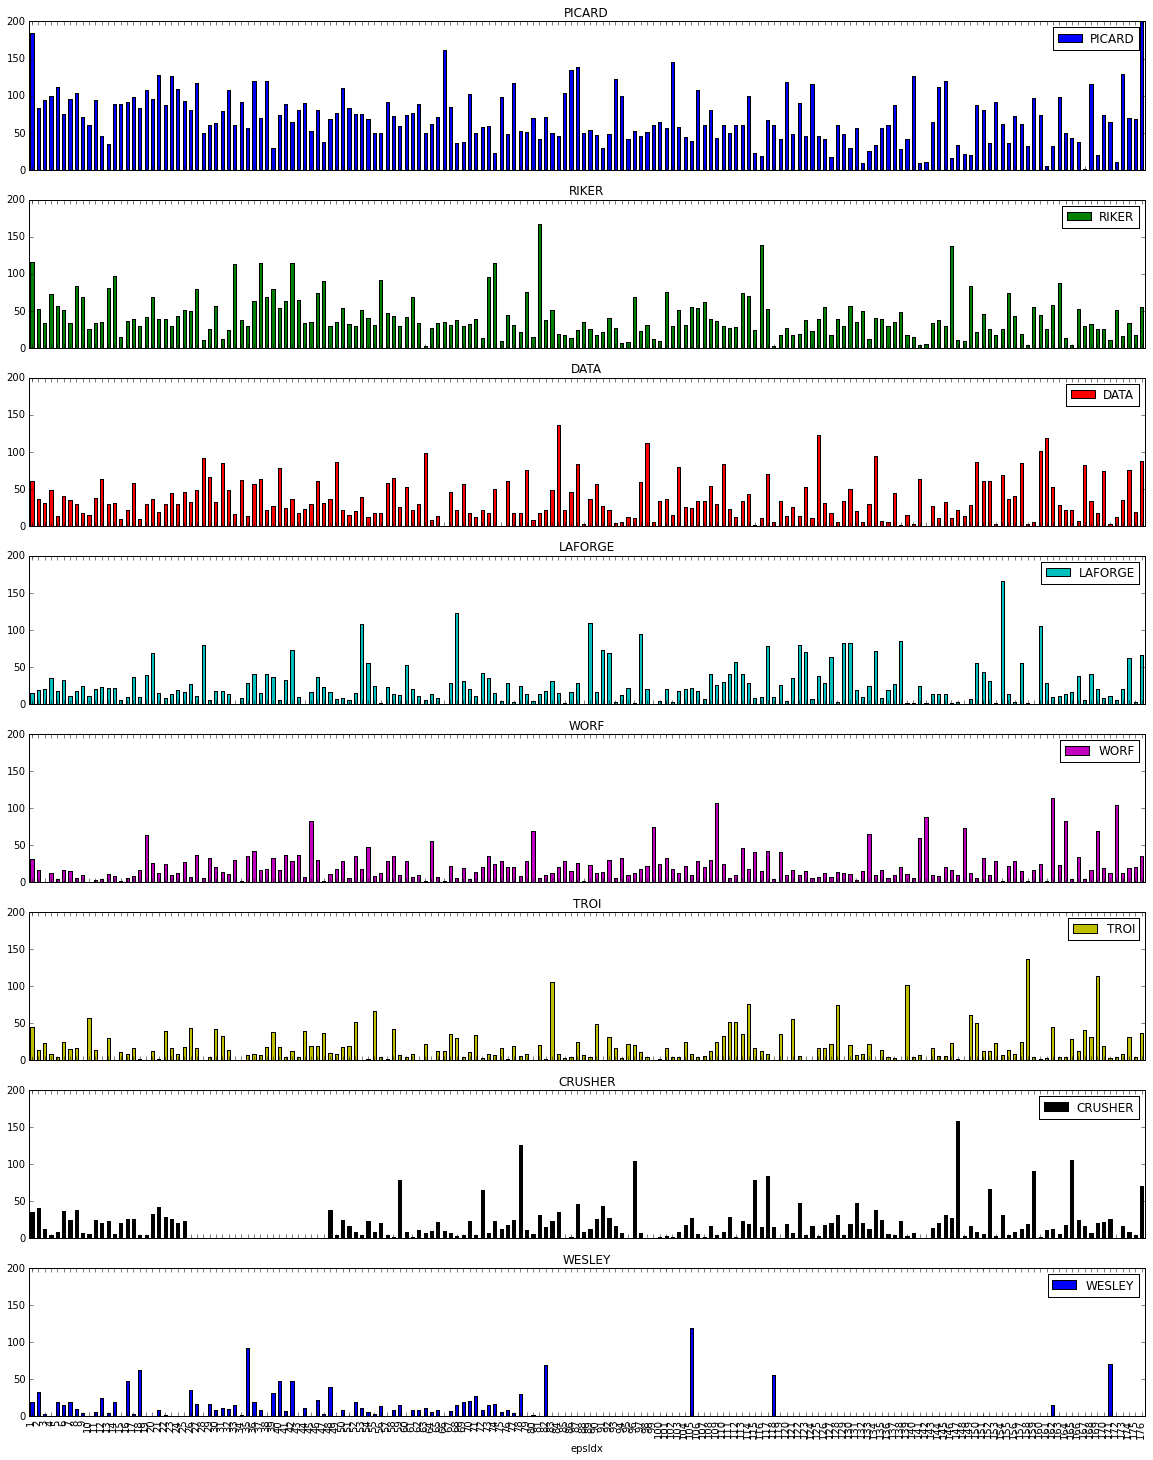

In [15]:
axs = whoWhere[maincrew].plot(subplots=True, grid=False, figsize=(20,25), kind="bar" )
for ax in axs:
    ax.set_ylim(0,200) # we need this to set the same height in every subplot. otherwise it is auto-adjusted

beautiful - we can recognize the "CRUSHER-PULASKI-GAP" veeery nicely!

Let's see, where PULASKI had her big moments:


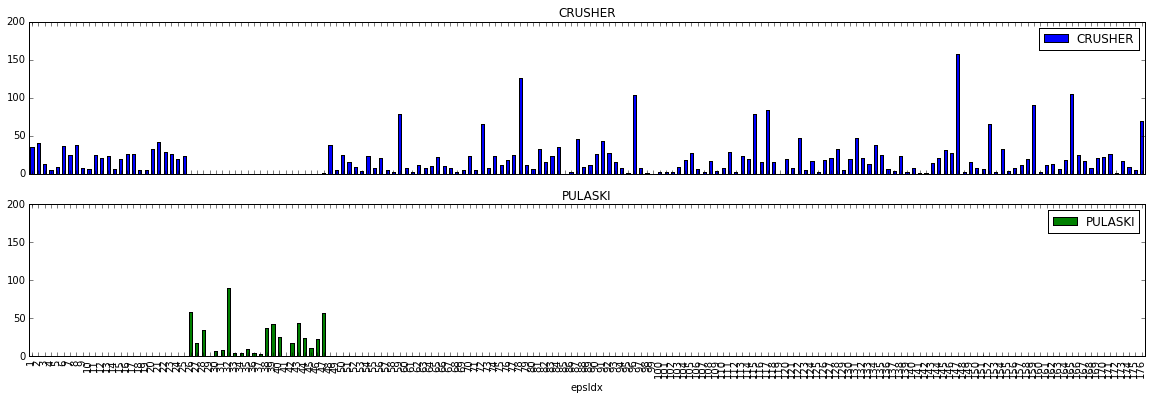

In [16]:
axs = whoWhere[["CRUSHER","PULASKI"]].plot(subplots=True, grid=False, figsize=(20,6), kind="bar" )
for ax in axs:
    ax.set_ylim(0,200)

yes, that's what we thought!

but what are the episodes the main characters did not appear in?

In [17]:
whoWhere[maincrew].isnull().any()

character
PICARD     False
RIKER      False
DATA        True
LAFORGE     True
WORF        True
TROI        True
CRUSHER     True
WESLEY      True
dtype: bool

at least Picard and Riker appeared in every episode - astonishing.

to get the episodes, where the main characters did not appear in, we have to do some more complicated stuff, but amazingly it is a 3-liner only.

1. `whoWhereMain.isnull()` gives us `whoWhereMain` with only `True` or `False` in every cell
2. `stack()` returns the columns back into the index, BUT: because there are TRUE-values now, where before there was no entry at all, we now have more rows! (e.g. WORF has the value 0 now in epsIdx=3):



In [20]:
# main characters only:
whoWhereMain = whoWhere[maincrew].copy()

whoWhereMain.isnull().stack().loc[1:3, "WORF"] # get the first 3 episodes-index-values of WORF

epsIdx  character
1       WORF         False
2       WORF         False
3       WORF          True
dtype: bool

3. `[whoWhereMain.isnull().stack() == True]` gives us ONLY the `True` rows
4. thats pretty much the same with `whoWhereMain.fillna(0).stack()`which gives us a Series with all the line counts per episode/character including "0-values"
5. using `[whoWhereMain.isnull().stack()]` as boolean mask gives us only the 0 values 
6. and via `reset_index()` we put the index back into columns

In [21]:


# [whoWhereMain.isnull().stack() == True] gets a Series which is TRUE w
whoWhereMainNot = whoWhereMain.fillna(0).stack()[whoWhereMain.isnull().stack() == True].reset_index()
whoWhereMainNot.head(20) # the CRUSHER-PULASKI-GAP starts at episode 26...


,epsIdx,character,0
0,3,WORF,0
1,4,WESLEY,0
2,9,TROI,0
3,10,WORF,0
4,10,WESLEY,0
5,12,TROI,0
6,14,TROI,0
7,15,WESLEY,0
8,19,TROI,0
9,19,WESLEY,0


In [22]:
print "number of episodes these characters did not appear in:"
whoWhereMainNot.groupby("character").size().order(ascending=False)

number of episodes these characters did not appear in:


character
WESLEY     108
CRUSHER     24
TROI        13
LAFORGE      7
DATA         3
WORF         2
dtype: int64


if we are interested, which episodes no DATA appeared, we just do:

In [23]:
noData = whoWhereMainNot[whoWhereMainNot["character"] == "DATA"]
noData

,epsIdx,character,0
47,66,DATA,0
50,75,DATA,0
120,142,DATA,0


In [25]:
# and the episode names are:
epsNames = cLinesDf["epsName"].unique()
zip(noData["epsIdx"], epsNames[noData["epsIdx"].values-1]) # -1 because the index starts at 0

[(66, "Captain's Holiday"), (75, 'Family'), (142, 'Birthright part 2')]

In [27]:
# or where DATA or LA FORGE are in holiday:
noDataAndLaForge = whoWhereMainNot[whoWhereMainNot["character"].isin(["DATA","LAFORGE"])]

# via zip() we can merge the two arrays like: 
#    (noDataAndLaForge["epsIdx"][0] , epsNames[noData...][0]),
#    (noDataAndLaForge["epsIdx"][1] , epsNames[noData...][1]),
#    ...
zip(noDataAndLaForge["epsIdx"],epsNames[noDataAndLaForge["epsIdx"].values-1])

[(33, 'A Matter of Honour'),
 (44, 'Manhunt'),
 (66, "Captain's Holiday"),
 (66, "Captain's Holiday"),
 (75, 'Family'),
 (88, 'First Contact'),
 (99, 'Redemption'),
 (142, 'Birthright part 2'),
 (148, 'Rightful Heir'),
 (159, 'Attached')]

interesting: episode 66 seems to be a Captain's Episode all alone...

In [28]:
whoWhere[maincrew].loc[66]

character
PICARD     161
RIKER       35
DATA       NaN
LAFORGE    NaN
WORF         2
TROI        13
CRUSHER     10
WESLEY     NaN
Name: 66, dtype: float64

66  was obviously a PICARD episode. I wonder who else was the character with the most lines in the other episodes.

Do you reckon it was always Picard who had the most lines? No, there should be at least some DATA episodes. And what about the one with the double Riker? And than again there was this episode where La Forge was talking to this Holo-Leah all the time.

Let's see... 

At first I will normalize the episodes to the proportions a character has in a episode. That means, if there are 100 lines altogether and Picard hat 44 of them he gets a proportion-value of .44:

In [29]:
whoWhere
whoWhereProp = whoWhere.stack().groupby(level=0).apply(lambda x: x/float(x.sum())).unstack("character")
whoWhereProp[maincrew].head(8)

character,PICARD,RIKER,DATA,LAFORGE,WORF,TROI,CRUSHER,WESLEY
epsIdx,,,,,,,,
1,0.270191,0.170338,0.088106,0.022026,0.045521,0.066079,0.051395,0.029369
2,0.244118,0.155882,0.108824,0.055882,0.047059,0.041176,0.120588,0.097059
3,0.281437,0.101796,0.092814,0.062874,NaN,0.068862,0.038922,0.008982
4,0.257812,0.190104,0.125000,0.091146,0.031250,0.020833,0.013021,NaN
5,0.328446,0.167155,0.041056,0.052786,0.011730,0.014663,0.026393,0.055718
6,0.214900,0.146132,0.114613,0.091691,0.045845,0.068768,0.106017,0.045845
7,0.251323,0.087302,0.092593,0.029101,0.039683,0.039683,0.066138,0.050265
8,0.274406,0.221636,0.076517,0.044855,0.013193,0.042216,0.100264,0.026385


In [32]:
import numpy as np

#  -- let's do a little health check --
# all proportions in all episode groups should add up to 1.0:
np.allclose(whoWhereProp.stack().groupby(level=0).sum(), 1)

True

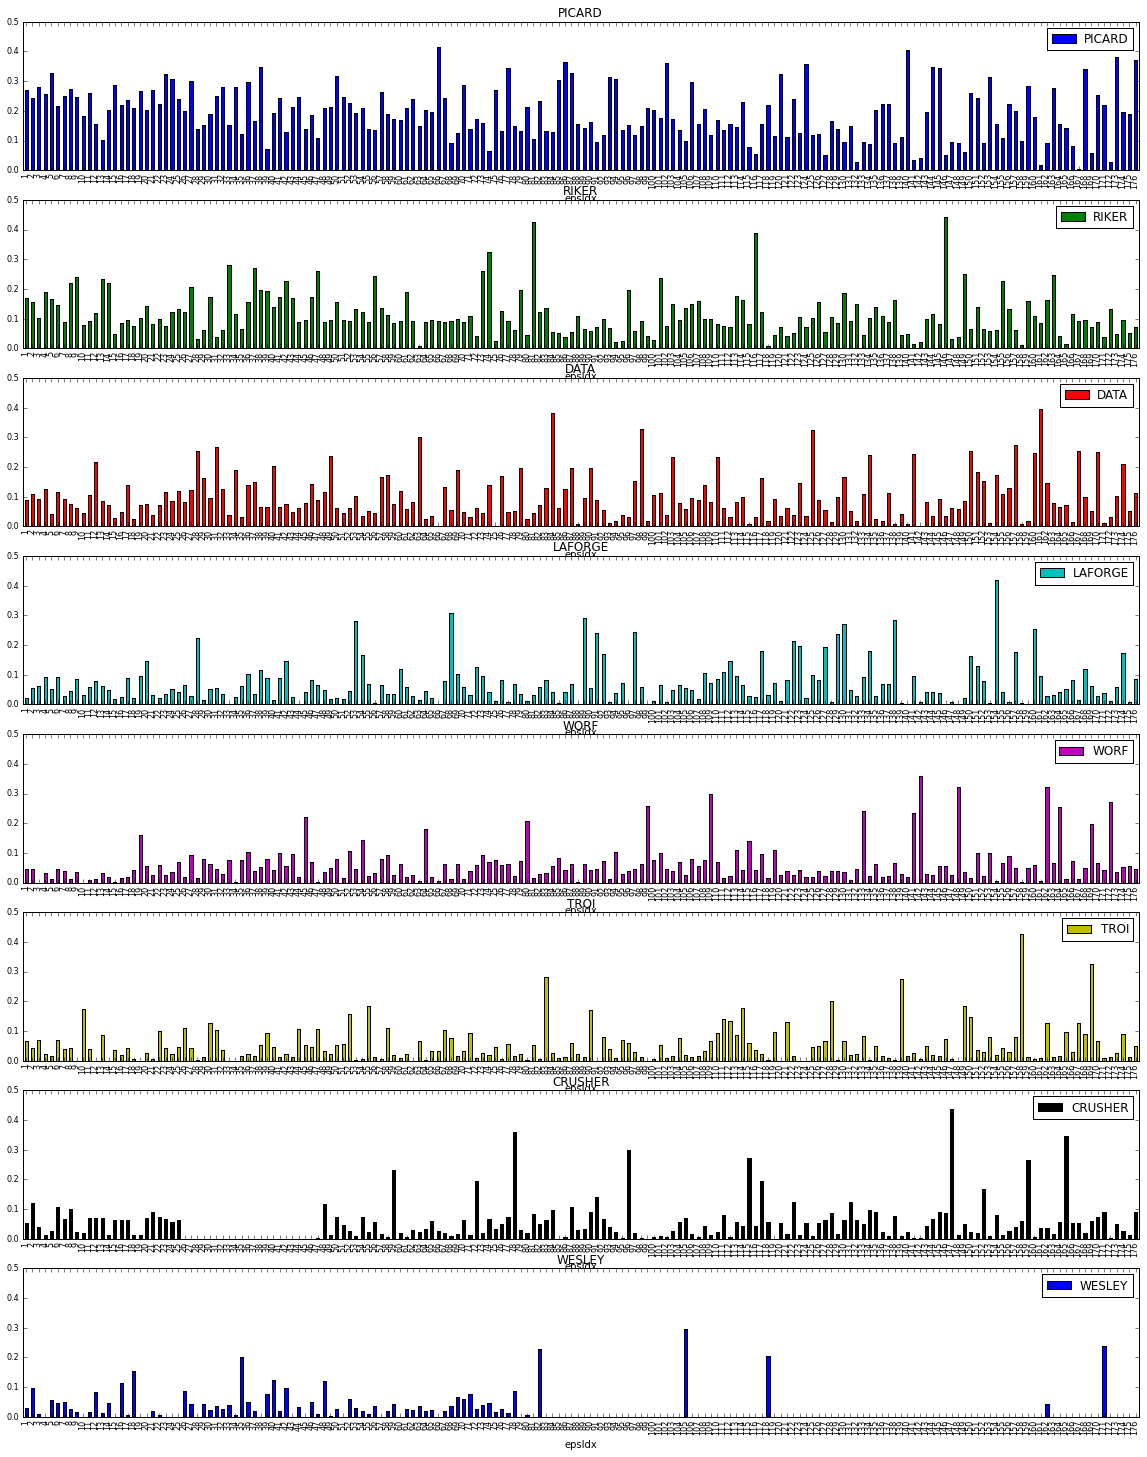

In [33]:
# this should look pretty much the same as above
axs = whoWhereProp[maincrew].plot(subplots=True, grid=False, figsize=(20,25), kind="bar", sharex=False , fontsize="8")
for ax in axs:
    ax.set_ylim(0,0.50)
#axs

It's close but it is not the same: 

If you look closly, you will notice, that some bars of this proportion-plot are smaller or higher than their neighbour-bars in comparison to the plot with the absolute line number at the top. That's ok, because, sometimes a lot of spoken lines does not weight so much, if all other characters also speak a lot!

Let's see now, what the characters have the max proportions in an episode:

In [34]:
# via idxmax we get the column, where this idx=row is max!
idxEpsMax = whoWhereProp.idxmax(axis=1).to_frame() 
# it not necessary, but it's nicer to have a speaking column name for the speaking characters
idxEpsMax = idxEpsMax.rename(columns = {0:'character'})
# add the episode names
idxEpsMax["epsName"] = epsNames[idxEpsMax.index-1]

# and again we count:
whoWasMax = idxEpsMax.groupby("character").size().order(ascending=False)
whoWasMax

character
PICARD       76
DATA         20
RIKER        16
LAFORGE      10
CRUSHER       9
WORF          8
TROI          4
LWAXANA       3
BARCLAY       2
WESLEY        2
K'EHLEYR      2
CLARA         1
CLEMENS       1
CONOR         1
JEV           1
ARMUS         1
DURKEN        1
FAJO          1
AMANDA        1
JAMESON       1
JELLICO       1
MADRED        1
MARR          1
OKONA         1
PICARD JR     1
Q             1
RAL           1
RASMUSSEN     1
RIKER 2       1
RO            1
SALIA         1
SCOTT         1
SITO          1
SPOCK         1
ALKAR         1
dtype: int64

now - who would have thought that! 

There are obviously round about 40 episodes where not the 7 main characters have the most spoken lines

In [35]:
# DATA's episodes
idxEpsMax[idxEpsMax["character"] == "DATA"]

,character,epsName
epsIdx,,
12,DATA,Datalore
28,DATA,"Elementary, Dear Data"
31,DATA,The Schizoid Man
40,DATA,Pen Pals
49,DATA,The Ensigns of Command
63,DATA,The Offspring
76,DATA,Brothers
79,DATA,Legacy
84,DATA,Data's Day


In [36]:
# RIKER's till TROI's episodes
idxEpsMax[idxEpsMax["character"].isin(whoWasMax.index[2:7])]

,character,epsName
epsIdx,,
13,RIKER,Angel One
14,RIKER,11001001
33,RIKER,A Matter of Honour
37,RIKER,The Royale
39,RIKER,The Icarus Factor
42,RIKER,Samaritan Snare
47,RIKER,Shades of Gray
53,LAFORGE,Booby Trap
56,RIKER,The Vengeance Factor


In [37]:

# the episodes where other characters play the main role
idxEpsMax[idxEpsMax["character"].isin(whoWasMax.index[7:])]

,character,epsName
epsIdx,,
15,JAMESON,Too Short A Season
22,ARMUS,Skin of Evil
29,OKONA,The Outrageous Okona
35,SALIA,The Dauphin
45,K'EHLEYR,The Emissary
55,RAL,The Price
60,Q,Deja Q
69,FAJO,The Most Toys
71,LWAXANA,Menage a Troi


That someone has spoken a lot does not necessarily mean, that he spoke a lot more than others. Maybe he had just one line more to say than Picard. 

On the other hand: if the character speaks more than in every other episode it is definitely a big episodes for this character. 

These are two different questions - let's get to the second first.

To find the main episodes of a character, we need a metric that shows, how far away a characters proportion in one episode is form it's averange (or his **mean**-value )


**1. example:**

* If you have the **values [0.20,0.30,0.40]** then the **mean is 0.3**
* on average two values are 0.1 away from the mean, but if we add up **the differences [-0.1, 0, 0.1]**, we would end up at 0!
* to avoid this, we could take the absolute values (get rid of the minus) and get the absolute differences **[0.1, 0, 0.1]**
* the mean of these differences is sum([-0.1, 0, 0.1])/3 = 0.2/3 = **0.066 = mean difference** - that means: on averange the values are 0.066 from 0.3 away. 
* if we now would get a value like 0.366, we could say, thats still pretty close to the average. If we get a value like 0.39 we could say, that's a outstandig value.

You may say: wait,thats counter-intuitive 0.40 is also more than 0.07 away from 0.3! So how can 0.40 be *outstanding*, if it is already in the values! 

That is right, but that's only because the example is so small and because 0.3 is also in the values.
If you have - like - **20\*0.2 and 20\*0.4** (example2) you would get a *mean difference of 0.0977* and 0.40 would not be very far away from 0.3+0.0977=0.3977

So basically we did the following to get the mean difference:

```
               SUMofAllValues (      ABS( mean MINUS onevalue )  )  / COUNTofAllValues
```


In statistics, the standard deviation ("std") is very similar to the mean difference and more common: 

```
 SQUAREROOT(   SUMofAllValues(    SQUARE( mean MINUS onevalue )  )  / COUNTofAllValues    )

```
Basically instead of using the ABSolute value of the differences, we SQUARE it and take the SQUAREROOT of the sum in the end.
The outcome is a slightly higher value which has some other mathematical advantages which are not interesting now.

But in the end we have the same: **a metric, which shows us, how far away a value normaly is from the mean!**


In [38]:
example1 = np.array([0.2,0.3,0.4])
example1Diffs = example1 - example1.mean()
example1MeanDiffs = abs(example1Diffs).sum()/len(example1Diffs)
example1MeanDiffs , example1.std() # there is a std-function in numpy arrays


(0.066666666666666666, 0.081649658092772609)

In [39]:
# you might also try the example without the 0.3 value
example1 = np.array([0.2,0.4])
example1Diffs = example1 - example1.mean()
example1MeanDiffs = abs(example1Diffs).sum()/len(example1Diffs)
example1MeanDiffs , example1.std()

(0.10000000000000001, 0.10000000000000001)

In [43]:
# now with 41 values
example2 = [0.3]
example2.extend([0.2]*20)
example2.extend([0.4]*20)
print "more values:"
print example2

example2 = np.array(example2)
example2Diffs = example2 - example2.mean()
example2MeanDiffs = abs(example2Diffs).sum()/len(example2Diffs)
example2MeanDiffs , example2.std() # there is a std-function in numpy arrays


more values:
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


(0.097560975609756101, 0.09877295966495897)

Let's calculate the mean, mean+/-1 std and mean+/-2*std for every character of the main crew:

In [44]:
cMeanStds = pd.DataFrame({
                     "character": maincrew,
                     "mean": whoWhereProp[maincrew].stack().groupby(level=1).mean(),
                     "std":  whoWhereProp[maincrew].stack().groupby(level=1).std()
                    })
cMeanStds["mean+2"] = cMeanStds["mean"] + cMeanStds["std"]+ cMeanStds["std"]
cMeanStds["mean+1"] = cMeanStds["mean"] + cMeanStds["std"]
cMeanStds["mean-1"] = cMeanStds["mean"] - cMeanStds["std"]
cMeanStds["mean-2"] = cMeanStds["mean"] - cMeanStds["std"]- cMeanStds["std"]


cMeanStds


,character,mean,std,mean+2,mean+1,mean-1,mean-2
character,,,,,,,
PICARD,PICARD,0.192061,0.086738,0.365536,0.278799,0.105323,0.018586
RIKER,RIKER,0.114889,0.073739,0.262366,0.188628,0.041150,-0.032588
DATA,DATA,0.101096,0.077470,0.256035,0.178565,0.023626,-0.053844
LAFORGE,LAFORGE,0.073954,0.071079,0.216113,0.145034,0.002875,-0.068205
WORF,WORF,0.062885,0.064685,0.192256,0.127571,-0.001800,-0.066486
TROI,TROI,0.054898,0.062594,0.180085,0.117491,-0.007696,-0.070290
CRUSHER,CRUSHER,0.059680,0.068826,0.197331,0.128506,-0.009146,-0.077971
WESLEY,WESLEY,0.055955,0.060313,0.176582,0.116268,-0.004358,-0.064672


There are minus values in "mean-1" and "mean-2", what seems to be wrong, because negative propotions are impossible (maybe Q could appear less then zero times in an episode, but let's focus...):

For example, TROI has 50% of her episodes below 0.05 and only a few are over 0.3 what leads to a slightly higher mean and a for higher std.

Let's look at an example again:

In [45]:
example3 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
                     0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
                     0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
                     0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])
print "mean: %+4.2f \t std: %+4.2f \t mean-std:%+4.2f " % (example3.mean() , example3.std() , example3.mean() - example3.std() )


# slightly higher mean, but pretty high std 
#   because of one 1.5 value!
example3 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
                     0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
                     0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
                     0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
                     1.5])
print "mean: %+4.2f \t std: %+4.2f \t mean-std:%+4.2f " % (example3.mean() , example3.std() , example3.mean() - example3.std()) 




mean: +0.15 	 std: +0.05 	 mean-std:+0.10 
mean: +0.18 	 std: +0.21 	 mean-std:-0.03 


actually you can get a good overview of the statistical information via `describe()`:

In [46]:
whoWhereProp[maincrew].describe()

,PICARD,RIKER,DATA,LAFORGE,WORF,TROI,CRUSHER,WESLEY
count,176.000000,176.000000,173.000000,169.000000,174.000000,163.000000,152.000000,68.000000
mean,0.192061,0.114889,0.101096,0.073954,0.062885,0.054898,0.059680,0.055955
std,0.086738,0.073739,0.077470,0.071079,0.064685,0.062594,0.068826,0.060313
min,0.003086,0.006135,0.006667,0.002865,0.002890,0.002551,0.002604,0.002770
25%,0.130633,0.066494,0.045593,0.027682,0.024308,0.015055,0.017723,0.019571
50%,0.189959,0.094949,0.081281,0.054726,0.044969,0.035599,0.047973,0.037658
75%,0.247768,0.149336,0.131429,0.090024,0.073100,0.072111,0.069916,0.062315
max,0.416021,0.440895,0.396667,0.419192,0.359184,0.428125,0.437673,0.296020


Let's get all the episodes, where PICARD is below his mean-1std:


In [47]:
c = "PICARD"
picardLess = whoWhereProp[
               (whoWhereProp[c] < cMeanStds.loc[c]["mean-1"])  
                         ]
zip(picardLess.index.values, epsNames[picardLess.index.values-1])


[(13, 'Angel One'),
 (39, 'The Icarus Factor'),
 (68, 'Hollow Pursuits'),
 (74, 'The Best of Both Worlds, Part 2'),
 (81, 'Future Imperfect'),
 (91, 'Identity Crisis'),
 (105, 'The Game'),
 (115, 'Ethics'),
 (116, 'The Outcast'),
 (127, 'Realm of Fear'),
 (130, 'Schisms'),
 (132, 'Rascals'),
 (133, 'A Fistful of Datas'),
 (134, 'The Quality of Life'),
 (138, 'Aquiel'),
 (141, 'Birthright part 1'),
 (142, 'Birthright part 2'),
 (146, 'Frame of Mind'),
 (147, 'Suspicions'),
 (148, 'Rightful Heir'),
 (149, 'Second Chances'),
 (152, 'Descent part 2'),
 (158, 'Dark Page'),
 (161, 'Inheritance'),
 (162, 'Parallels'),
 (166, 'Lower Decks'),
 (167, 'Thine Own Self'),
 (169, 'Eye Of The Beholder'),
 (172, 'Firstborn')]

looks like a lot 100er values - for some reason Patrick Steward seems to have had less ambitioning episodes in the end:


<Container object of 176 artists>

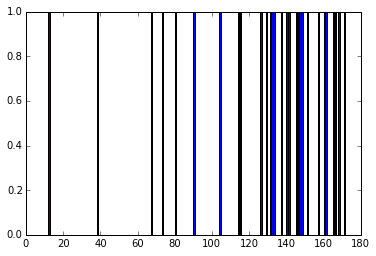

In [48]:
eps = np.arange(0,176)
plt.bar(eps,[x in picardLess.index.values-1 for x in eps])


Let's do a histrogram, to see the count of less episodes per episode-area in 10 episode steps:

the hist bin-areas:
[  13.    28.9   44.8   60.7   76.6   92.5  108.4  124.3  140.2  156.1
  172. ]

for example the first area-count goes from [0 to  13.0 ] and then from [ 13.0  to  28.9 ], etc...


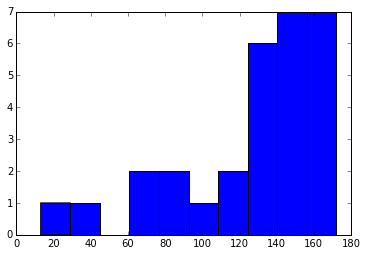

In [49]:
plt.figure()

histValues = plt.hist(picardLess.index.values, bins=10)
cnt, epsAreas = histValues[0],histValues[1]
print "the hist bin-areas:"
print epsAreas
print
print "for example the first area-count goes from [0 to ", epsAreas[0], "] and then from [", epsAreas[0], " to " , epsAreas[1], "], etc..." 

Yes, it really looks like he was less talkative  in the last 50 episodes.
Let's compare to his more active episodes and the normal ones:

(array([ 3.,  6.,  2.,  2.,  4.,  4.,  2.,  1.,  3.,  4.]),
 array([   3. ,   20.3,   37.6,   54.9,   72.2,   89.5,  106.8,  124.1,
         141.4,  158.7,  176. ]),
 <a list of 10 Patch objects>)

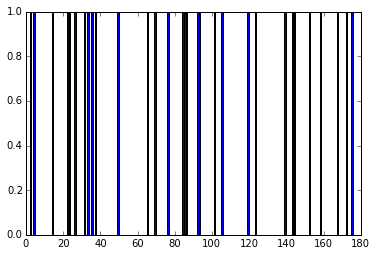

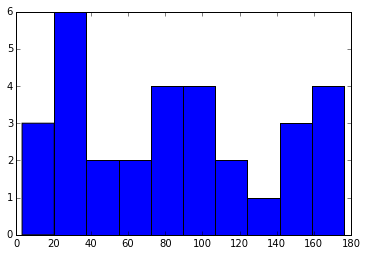

In [50]:
picardMore = whoWhereProp[
               (whoWhereProp[c] > cMeanStds.loc[c]["mean+1"])  
                         ]
zip(picardMore.index.values, epsNames[picardMore.index.values-1])
plt.bar(eps,[x in picardMore.index.values-1 for x in eps])
plt.figure()
plt.hist(picardMore.index.values)

(array([ 14.,  12.,  14.,  14.,  11.,  13.,  13.,  10.,   7.,   8.]),
 array([   1. ,   18.4,   35.8,   53.2,   70.6,   88. ,  105.4,  122.8,
         140.2,  157.6,  175. ]),
 <a list of 10 Patch objects>)

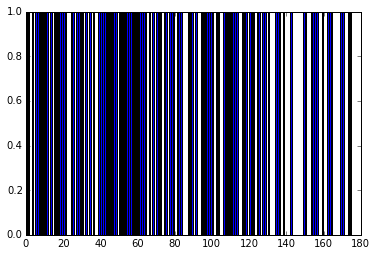

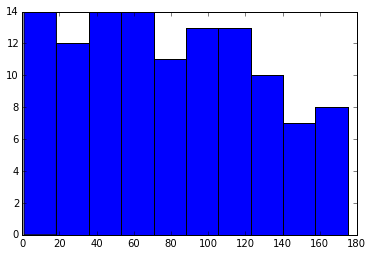

In [51]:
picardNorm = whoWhereProp[
                (whoWhereProp[c] >= cMeanStds.loc[c]["mean-1"])  
               &(whoWhereProp[c] <= cMeanStds.loc[c]["mean+1"])
                         ]
zip(picardNorm.index.values, epsNames[picardNorm.index.values-1])
plt.bar(eps,[x in picardNorm.index.values-1 for x in eps])
plt.figure()
plt.hist(picardNorm.index.values)

We can also combine the histograms to have a better overview.

After all at least it looks like the more active episodes (green) did not suffer because of the less active ones (blue):

([array([ 1.,  0.,  1.,  1.,  2.,  2.,  2.,  6.,  8.,  6.]),
  array([  4.,   5.,   4.,   3.,   6.,   5.,   4.,   8.,  11.,  10.]),
  array([ 18.,  17.,  18.,  17.,  18.,  17.,  18.,  17.,  18.,  18.])],
 array([   1. ,   18.5,   36. ,   53.5,   71. ,   88.5,  106. ,  123.5,
         141. ,  158.5,  176. ]),
 <a list of 3 Lists of Patches objects>)

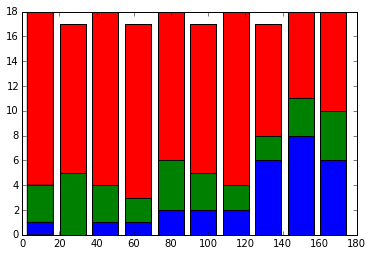

In [52]:
plt.hist([picardLess.index.values,picardMore.index.values,picardNorm.index.values], stacked=True)

We took the mean+1std limit, to analyze Picards episodes, but why don't we take the mean+2 limit or the mean+1.5 limit?
Let's have a closer look at the distributions of the main-characters. 

We plot the sorted episode proportions of every character and also draw the mean, mean+/-1 and the mean +/-2 (minus only, if it is not negative). With this plots we hopfully can recoginze, which limit to take is best:

*** EVALUATING  PICARD  ************************************************************** 
176  total count where this character has played
116  are in the mean-1std ( 0.105323245149 ) till mean+1std ( 0.278798558592 ) area
120.0  would be in this area if we had a normal distribution

31  are in the area above mean+1std: 17.6136363636 %
28.0  would be in this area if we had a normal distribution

29  are in the area below mean-1std: 16.4772727273 %
28.0  would be in this area if we had a normal distribution
0.19206090187 is the characters mean value
86  episodes of  PICARD  are over the mean value : 48.8636363636 %


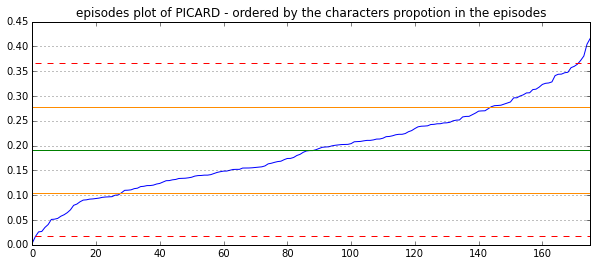

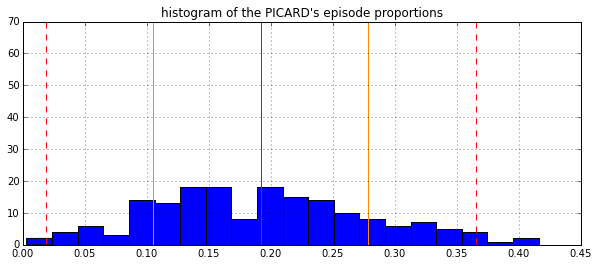


*** EVALUATING  RIKER  ************************************************************** 
176  total count where this character has played
135  are in the mean-1std ( 0.0411503071076 ) till mean+1std ( 0.18862752018 ) area
120.0  would be in this area if we had a normal distribution

24  are in the area above mean+1std: 13.6363636364 %
28.0  would be in this area if we had a normal distribution

17  are in the area below mean-1std: 9.65909090909 %
28.0  would be in this area if we had a normal distribution
0.114888913644 is the characters mean value
65  episodes of  RIKER  are over the mean value : 36.9318181818 %


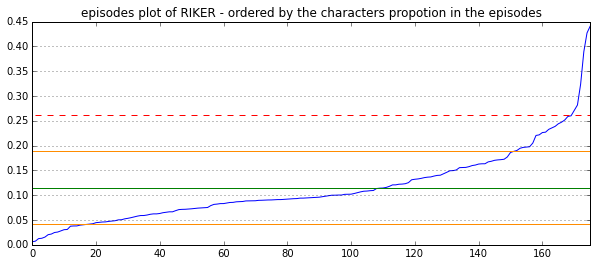

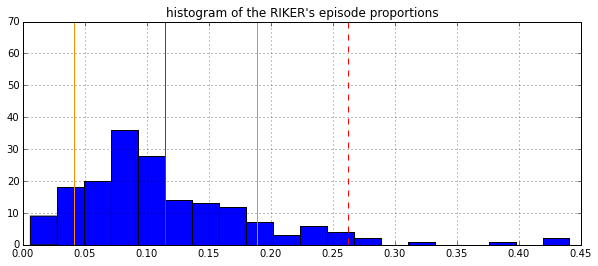


*** EVALUATING  DATA  ************************************************************** 
173  total count where this character has played
131  are in the mean-1std ( 0.0236259670174 ) till mean+1std ( 0.178565157028 ) area
118.0  would be in this area if we had a normal distribution

26  are in the area above mean+1std: 15.0289017341 %
27.0  would be in this area if we had a normal distribution

16  are in the area below mean-1std: 9.24855491329 %
27.0  would be in this area if we had a normal distribution
0.101095562023 is the characters mean value
64  episodes of  DATA  are over the mean value : 36.9942196532 %


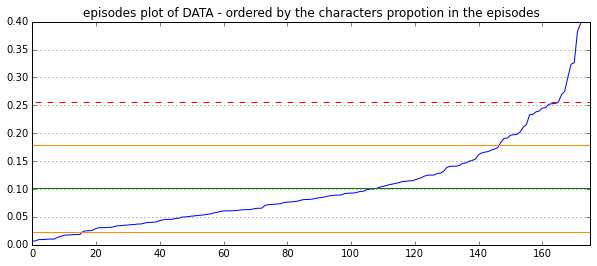

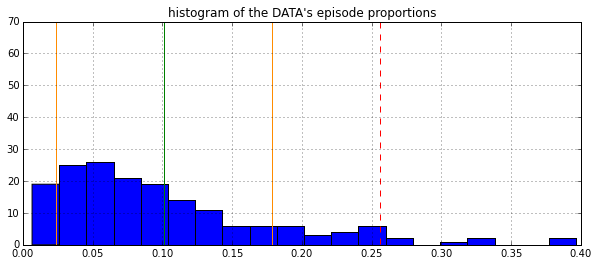


*** EVALUATING  LAFORGE  ************************************************************** 
169  total count where this character has played
144  are in the mean-1std ( 0.00287468456777 ) till mean+1std ( 0.145033572621 ) area
115.0  would be in this area if we had a normal distribution

24  are in the area above mean+1std: 14.201183432 %
27.0  would be in this area if we had a normal distribution

1  are in the area below mean-1std: 0.591715976331 %
27.0  would be in this area if we had a normal distribution
0.0739541285942 is the characters mean value
57  episodes of  LAFORGE  are over the mean value : 33.7278106509 %


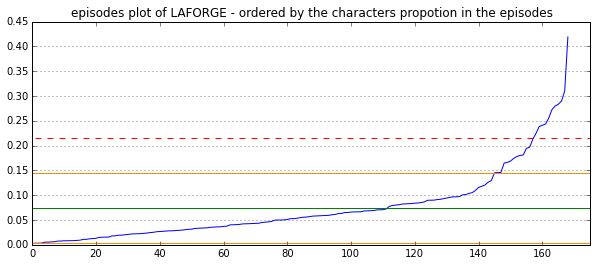

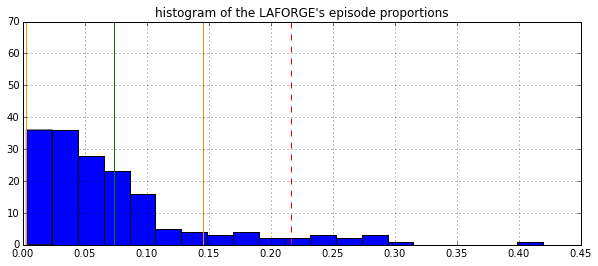


*** EVALUATING  WORF  ************************************************************** 
174  total count where this character has played
158  are in the mean-1std ( -0.00180005032361 ) till mean+1std ( 0.127570929689 ) area
119.0  would be in this area if we had a normal distribution

16  are in the area above mean+1std: 9.19540229885 %
28.0  would be in this area if we had a normal distribution

0  are in the area below mean-1std: 0.0 %
28.0  would be in this area if we had a normal distribution
0.0628854396829 is the characters mean value
58  episodes of  WORF  are over the mean value : 33.3333333333 %


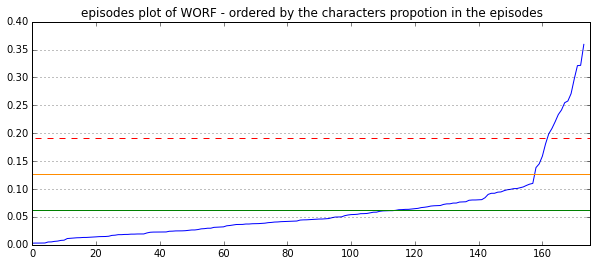

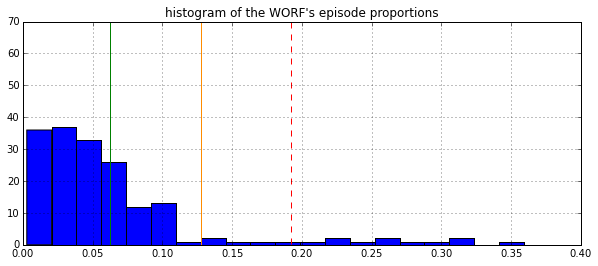


*** EVALUATING  TROI  ************************************************************** 
163  total count where this character has played
145  are in the mean-1std ( -0.00769628244308 ) till mean+1std ( 0.117491334415 ) area
111.0  would be in this area if we had a normal distribution

18  are in the area above mean+1std: 11.0429447853 %
26.0  would be in this area if we had a normal distribution

0  are in the area below mean-1std: 0.0 %
26.0  would be in this area if we had a normal distribution
0.0548975259861 is the characters mean value
55  episodes of  TROI  are over the mean value : 33.7423312883 %


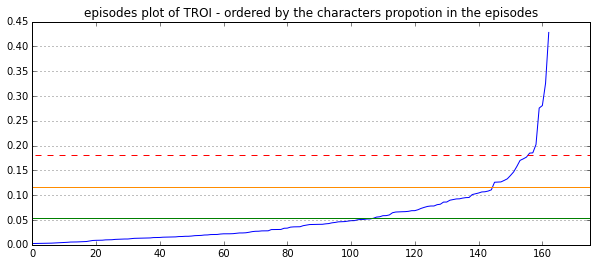

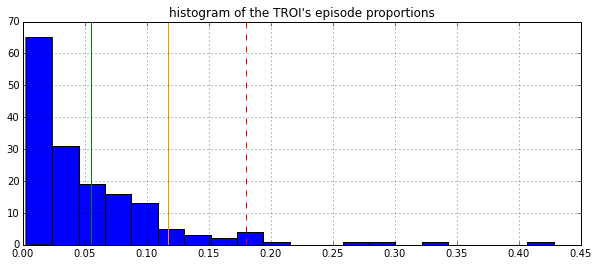


*** EVALUATING  CRUSHER  ************************************************************** 
152  total count where this character has played
141  are in the mean-1std ( -0.00914564537128 ) till mean+1std ( 0.128505680372 ) area
104.0  would be in this area if we had a normal distribution

11  are in the area above mean+1std: 7.23684210526 %
24.0  would be in this area if we had a normal distribution

0  are in the area below mean-1std: 0.0 %
24.0  would be in this area if we had a normal distribution
0.0596800175002 is the characters mean value
58  episodes of  CRUSHER  are over the mean value : 38.1578947368 %


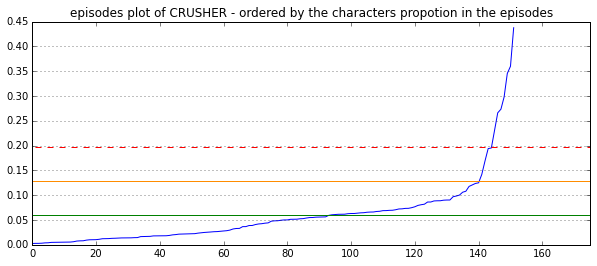

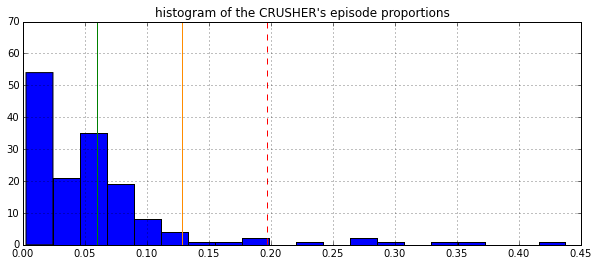


*** EVALUATING  WESLEY  ************************************************************** 
68  total count where this character has played
60  are in the mean-1std ( -0.00435843509324 ) till mean+1std ( 0.116268410049 ) area
46.0  would be in this area if we had a normal distribution

8  are in the area above mean+1std: 11.7647058824 %
11.0  would be in this area if we had a normal distribution

0  are in the area below mean-1std: 0.0 %
11.0  would be in this area if we had a normal distribution
0.0559549874778 is the characters mean value
19  episodes of  WESLEY  are over the mean value : 27.9411764706 %


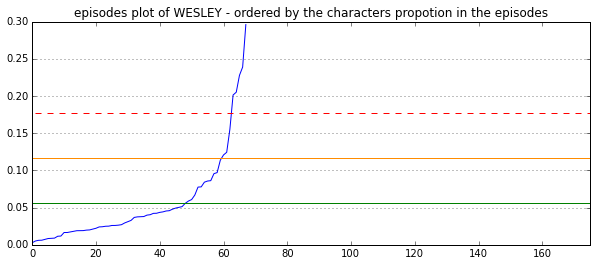

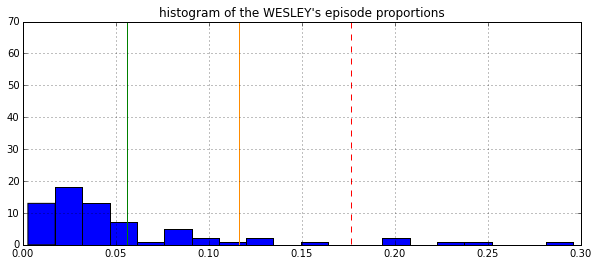

In [54]:
epsIdx = whoWhere.index
for c in maincrew:

    print "*** EVALUATING ", c, " ************************************************************** "
    # we reset the index, because we want to count form 1 to 176 (try the plots without - does not look nice...)
    df = whoWhereProp[c].order(ascending=True).to_frame().reset_index() 
    ax = df[c].plot(figsize=(10,4), fontsize=10)
    ax.yaxis.grid(True)
    
    mean2min = cMeanStds.loc[c]["mean-2"]
    mean1min = cMeanStds.loc[c]["mean-1"]
    mean = cMeanStds.loc[c]["mean"]
    mean1max = cMeanStds.loc[c]["mean+1"]
    mean2max = cMeanStds.loc[c]["mean+2"]
    
    
    ##### PRINTING SOME BASIC FACT's ######
    
    epsOfC = df[ (df[c] > 0.0) ]["epsIdx"].size
    print epsOfC, " total count where this character has played"
    print df[ (df[c] < mean1max)
            & (df[c] > mean1min)]["epsIdx"].size, " are in the mean-1std (",mean1min,") till mean+1std (",mean1max,") area"
    
    # the episode proportions are not "normal distributed" - you may remember the "gaussian bell-shaped curve" at school ?
    #   if it would be, we would have the lucky fact, that 68,26% of all values would be in mean-1 till mean +1 
    #   that's one of the big mathematical advantages of std over the "average difference"!
    print np.round(epsOfC * 0.682689), " would be in this area if we had a normal distribution"
    print
    print df[ (df[c] > mean1max)]["epsIdx"].size, " are in the area above mean+1std:", df[ (df[c] > mean1max)]["epsIdx"].size / float(epsOfC) * 100, "%"
    #   also, if we had a "normal distribution", there would be (100-68)/2 % in the area above mean+1std
    print np.round((epsOfC-(epsOfC * 0.682689))/2) , " would be in this area if we had a normal distribution"
    print
    #   also, if we had a "normal distribution", there would be (100-68)/2 % in the area below mean-1std
    print df[ (df[c] < mean1min)]["epsIdx"].size, " are in the area below mean-1std:", df[ (df[c] < mean1min)]["epsIdx"].size / float(epsOfC) * 100, "%"
    print np.round((epsOfC-(epsOfC * 0.682689))/2) , " would be in this area if we had a normal distribution"

    # search for the episode, which is closest to the mean in the ordered DataFrame
    idxOfEpsWithMean = df[c].searchsorted(mean)[0] 
    print mean, "is the characters mean value"
    print epsOfC - idxOfEpsWithMean, " episodes of ", c, " are over the mean value :", (epsOfC - idxOfEpsWithMean) / float(epsOfC) * 100, "%"
    # double check: the areas below the curve before and after the idxOfEpsWithMean-episode are the same:
    areaOverMeanIdx  =     (df[df.index > idxOfEpsWithMean ][c] -  mean).sum()
    areaBelowMeanIdx = abs((df[df.index < idxOfEpsWithMean ][c] -  mean).sum())
    #print areaOverMeanIdx, areaBelowMeanIdx, areaOverMeanIdx - areaBelowMeanIdx
    
    
    
    ##### PLOTTING ######
    
    # plotting the characters proportion of every episode - sorted from min tp max
    plt.plot([epsIdx.size,0],[mean,mean], color="green")
    if mean2min > 0:
        plt.plot([epsIdx.size,0],[mean2min,mean2min],color="red", linestyle="--")
    if mean1min > 0:
        plt.plot([epsIdx.size,0],[mean1min,mean1min],color="darkorange")
    plt.plot([epsIdx.size,0],[mean1max,mean1max],color="darkorange")
    plt.plot([epsIdx.size,0],[mean2max,mean2max],color="red", linestyle="--")
    plt.title("episodes plot of "+c+" - ordered by the characters propotion in the episodes")
    
    # plotting the characters proportion as a histogram
    plt.figure() # new figure, to not draw on the figure of the plotting above
    whoWhereProp[c].hist(bins=20,figsize=(10,4))
    plt.plot([mean,mean],[70,0], color="green")
    if mean2min > 0:
        plt.plot([mean2min,mean2min],[70,0],color="red", linestyle="--")
    if mean1min > 0:
        plt.plot([mean1min,mean1min],[70,0],color="darkorange")
    plt.plot([mean1max,mean1max],[70,0],color="darkorange")
    plt.plot([mean2max,mean2max],[70,0],color="red", linestyle="--")
    plt.title("histogram of the "+c+"'s episode proportions")
    
    plt.show()
    print 

As mentioned in the comments above, if we would have a normal distribution, we had some specific useful properties, like mean-1std till mean+1std would represent 68.26% of the episodes of a character. 

(Actually Picard's, Rikers's and Data's distribution are closer to a normal distribution than the others, which probably speaks for his importance again...)

mean-2std till mean+2std area covers 95.44% of all values in a normal distribution, and is often used in statistics as a "significant" limit (5%), where everything out of this area is very unlikley to occure.
(more about that https://en.wikipedia.org/wiki/Standard_deviation#Rules_for_normally_distributed_data)


I would argue form the graphics above, that it is plausible to take the mean+1std border (the orange lines in the plots), to distinguish a characters "normal" episodes from intensive episodes. For example for TROI and WORF, you will recognize very well that the their "episodes plot" get's very step after mean+1std, what shows that proportions higher than mean+1std are very special for these character.






*[**TODO-Note to myself:** as a still learning amateur in statistics, the shape of the distributions reminds me of the poisson-distribution. I wonder, if poisson would fit better, for example to predict, whether a character will have a "big" episode in some intervall... ]*


PICARD *****************
[(13, 'Angel One'), (39, 'The Icarus Factor'), (68, 'Hollow Pursuits'), (74, 'The Best of Both Worlds, Part 2'), (81, 'Future Imperfect'), (91, 'Identity Crisis'), (105, 'The Game'), (115, 'Ethics'), (116, 'The Outcast'), (127, 'Realm of Fear'), (130, 'Schisms'), (132, 'Rascals'), (133, 'A Fistful of Datas'), (134, 'The Quality of Life'), (138, 'Aquiel'), (141, 'Birthright part 1'), (142, 'Birthright part 2'), (146, 'Frame of Mind'), (147, 'Suspicions'), (148, 'Rightful Heir'), (149, 'Second Chances'), (152, 'Descent part 2'), (158, 'Dark Page'), (161, 'Inheritance'), (162, 'Parallels'), (166, 'Lower Decks'), (167, 'Thine Own Self'), (169, 'Eye Of The Beholder'), (172, 'Firstborn')]


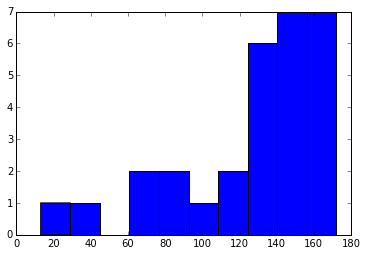


RIKER *****************
[(28, 'Elementary, Dear Data'), (31, 'The Schizoid Man'), (63, 'The Offspring'), (75, 'Family'), (86, "Devil's Due"), (94, 'The Drumhead'), (95, 'Half A Life'), (100, 'Redemption Part 2'), (118, 'The First Duty'), (141, 'Birthright part 1'), (142, 'Birthright part 2'), (147, 'Suspicions'), (148, 'Rightful Heir'), (158, 'Dark Page'), (164, 'Homeward'), (165, 'Sub Rosa'), (171, "Journey's End")]


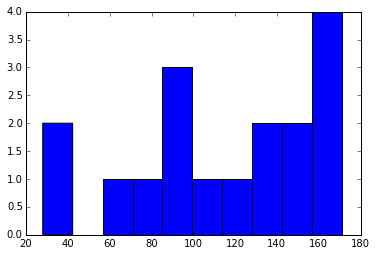


DATA *****************
[(88, 'First Contact'), (93, 'Qpid'), (94, 'The Drumhead'), (99, 'Redemption'), (115, 'Ethics'), (118, 'The First Duty'), (128, 'Man of The People'), (132, 'Rascals'), (136, 'Chain of Command, Part 2'), (138, 'Aquiel'), (140, 'Tapestry'), (153, 'Liaisons'), (158, 'Dark Page'), (159, 'Attached'), (166, 'Lower Decks'), (171, "Journey's End")]


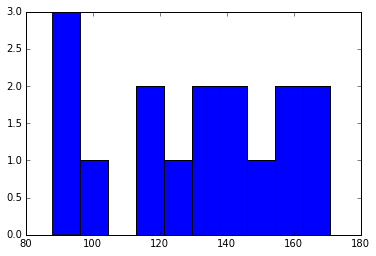


LAFORGE *****************
[(96, 'The Host')]

WORF *****************
[]

TROI *****************
[]

CRUSHER *****************
[]

WESLEY *****************
[]


In [58]:
# less than mean-std episodes
for c in maincrew:
    print 
    print c, "*****************"
    cLess = whoWhereProp[ (whoWhereProp[c] < cMeanStds.loc[c]["mean-1"])].index.values
    print zip(cLess, epsNames[cLess-1])  
    if (cLess.size > 1):
        plt.hist(cLess)
        plt.show()


PICARD *****************
[(3, 'Code Of Honour'), (5, 'Where No One Has Gone Before'), (15, 'Too Short A Season'), (23, "We'll Always Have Paris"), (24, 'Conspiracy'), (27, 'Where Silence Has Lease'), (32, 'Unnatural Selection'), (34, 'The Measure Of A Man'), (36, 'Contagion'), (38, 'Time Squared'), (50, 'The Survivors'), (66, "Captain's Holiday"), (70, 'Sarek'), (77, 'Suddenly Human'), (85, 'The Wounded'), (86, "Devil's Due"), (87, 'Clues'), (93, 'Qpid'), (94, 'The Drumhead'), (102, 'Ensign Ro'), (106, 'Unification Part 1'), (120, 'The Perfect Mate'), (124, 'The Inner Light'), (140, 'Tapestry'), (144, 'Lessons'), (145, 'The Chase'), (153, 'Liaisons'), (159, 'Attached'), (168, 'Masks'), (173, 'Bloodlines'), (176, 'All Good Things')]


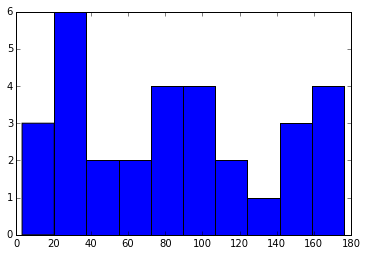


RIKER *****************
[(4, 'The Last Outpost'), (8, 'The Battle'), (9, 'Hide and Q'), (13, 'Angel One'), (14, '11001001'), (27, 'Where Silence Has Lease'), (33, 'A Matter of Honour'), (37, 'The Royale'), (38, 'Time Squared'), (39, 'The Icarus Factor'), (42, 'Samaritan Snare'), (47, 'Shades of Gray'), (56, 'The Vengeance Factor'), (73, 'The Best of Both Worlds, Part One'), (74, 'The Best of Both Worlds, Part 2'), (79, 'Legacy'), (81, 'Future Imperfect'), (96, 'The Host'), (101, 'Darmok'), (116, 'The Outcast'), (146, 'Frame of Mind'), (149, 'Second Chances'), (155, 'Gambit part 1'), (163, 'The Pegasus')]


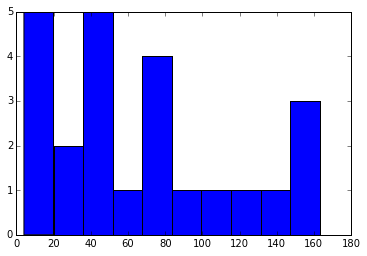


DATA *****************
[(12, 'Datalore'), (28, 'Elementary, Dear Data'), (31, 'The Schizoid Man'), (34, 'The Measure Of A Man'), (40, 'Pen Pals'), (49, 'The Ensigns of Command'), (63, 'The Offspring'), (69, 'The Most Toys'), (79, 'Legacy'), (84, "Data's Day"), (87, 'Clues'), (90, 'Night Terrors'), (98, 'In Theory'), (103, 'Silicon Avatar'), (110, 'Hero Worship'), (125, "Time's Arrow, part 1"), (134, 'The Quality of Life'), (141, 'Birthright part 1'), (150, 'Timescape'), (151, 'Descent part 1'), (157, 'Phantasms'), (160, 'Force of Nature'), (161, 'Inheritance'), (167, 'Thine Own Self'), (170, 'Genesis'), (174, 'Emergence')]


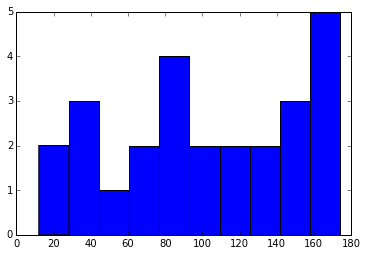


LAFORGE *****************
[(20, 'The Arsenal Of Freedom'), (28, 'Elementary, Dear Data'), (42, 'Samaritan Snare'), (53, 'Booby Trap'), (54, 'The Enemy'), (68, 'Hollow Pursuits'), (89, "Galaxy's Child"), (91, 'Identity Crisis'), (92, 'The Nth Degree'), (97, "The Mind's Eye"), (112, 'The Masterpiece Society'), (117, 'Cause and Effect'), (122, 'I, Borg'), (123, 'The Next Phase'), (127, 'Realm of Fear'), (129, 'Relics'), (130, 'Schisms'), (134, 'The Quality of Life'), (138, 'Aquiel'), (150, 'Timescape'), (154, 'Interface'), (157, 'Phantasms'), (160, 'Force of Nature'), (174, 'Emergence')]


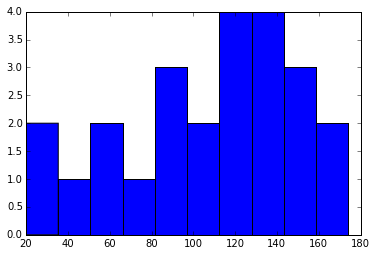


WORF *****************
[(19, 'Heart Of Glory'), (45, 'The Emissary'), (54, 'The Enemy'), (64, 'Sins of the Father'), (80, 'Reunion'), (99, 'Redemption'), (109, 'New Ground'), (115, 'Ethics'), (133, 'A Fistful of Datas'), (141, 'Birthright part 1'), (142, 'Birthright part 2'), (148, 'Rightful Heir'), (162, 'Parallels'), (164, 'Homeward'), (169, 'Eye Of The Beholder'), (172, 'Firstborn')]


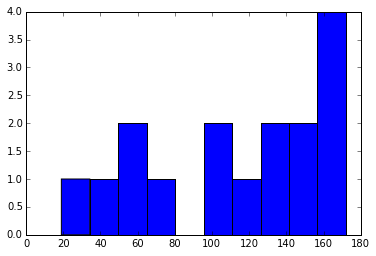


TROI *****************
[(10, 'Haven'), (30, 'Loud As A Whisper'), (52, 'The Bonding'), (55, 'The Price'), (83, 'The Loss'), (90, 'Night Terrors'), (111, 'Violations'), (112, 'The Masterpiece Society'), (114, 'Power Play'), (121, 'Imaginary Friend'), (128, 'Man of The People'), (139, 'Face of the Enemy'), (149, 'Second Chances'), (150, 'Timescape'), (158, 'Dark Page'), (162, 'Parallels'), (167, 'Thine Own Self'), (169, 'Eye Of The Beholder')]


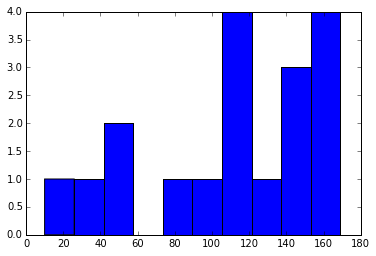


CRUSHER *****************
[(59, 'The High Ground'), (72, 'Transfigurations'), (78, 'Remember Me'), (91, 'Identity Crisis'), (96, 'The Host'), (115, 'Ethics'), (117, 'Cause and Effect'), (147, 'Suspicions'), (152, 'Descent part 2'), (159, 'Attached'), (165, 'Sub Rosa')]


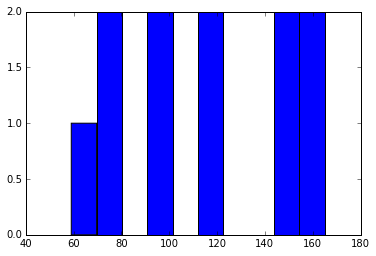


WESLEY *****************
[(18, 'Coming Of Age'), (35, 'The Dauphin'), (40, 'Pen Pals'), (48, 'Evolution'), (82, 'Final Mission'), (105, 'The Game'), (118, 'The First Duty'), (171, "Journey's End")]


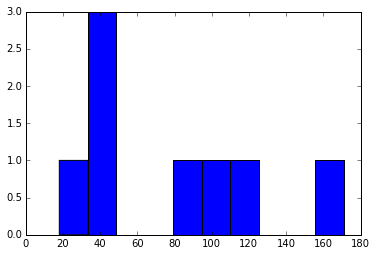

[array([  3,   5,  15,  23,  24,  27,  32,  34,  36,  38,  50,  66,  70,
         77,  85,  86,  87,  93,  94, 102, 106, 120, 124, 140, 144, 145,
        153, 159, 168, 173, 176], dtype=int64),
 array([  4,   8,   9,  13,  14,  27,  33,  37,  38,  39,  42,  47,  56,
         73,  74,  79,  81,  96, 101, 116, 146, 149, 155, 163], dtype=int64),
 array([ 12,  28,  31,  34,  40,  49,  63,  69,  79,  84,  87,  90,  98,
        103, 110, 125, 134, 141, 150, 151, 157, 160, 161, 167, 170, 174], dtype=int64),
 array([ 20,  28,  42,  53,  54,  68,  89,  91,  92,  97, 112, 117, 122,
        123, 127, 129, 130, 134, 138, 150, 154, 157, 160, 174], dtype=int64),
 array([ 19,  45,  54,  64,  80,  99, 109, 115, 133, 141, 142, 148, 162,
        164, 169, 172], dtype=int64),
 array([ 10,  30,  52,  55,  83,  90, 111, 112, 114, 121, 128, 139, 149,
        150, 158, 162, 167, 169], dtype=int64),
 array([ 59,  72,  78,  91,  96, 115, 117, 147, 152, 159, 165], dtype=int64),
 array([ 18,  35,  40,  48,  82, 

In [59]:
# more than mean+std episodes
cMores = []
for c in maincrew:
    print 
    print c, "*****************"
    cMore = whoWhereProp[ (whoWhereProp[c] > cMeanStds.loc[c]["mean+1"])].index.values
    print zip(cMore, epsNames[cMore-1])  
    cMores.append( cMore)
    if (cMore.size > 1):
        plt.hist(cMore)
        plt.show()
cMores

Let's have a look now, whether there are intersections - maybe there are episodes, where two or more characters are very active together?

In [60]:
import itertools

# combine every two arrays of mean+1std-arrays and find the intersections:
combinOfEveryTwoCharacters = itertools.combinations([set(epis.tolist()) for epis in cMores],2)
[set.intersection(*e) for e in combinOfEveryTwoCharacters if len(set.intersection(*e)) > 0]

[{27L, 38L},
 {34L, 87L},
 {159L},
 {79L},
 {42L},
 {149L},
 {96L},
 {28L, 134L, 150L, 157L, 160L, 174L},
 {141L},
 {90L, 150L, 167L},
 {40L},
 {54L},
 {112L, 150L},
 {91L, 117L},
 {162L, 169L},
 {115L}]

There ARE a lot of episodes where two characters team-up. Let's find out which:

In [62]:
arr = np.array([[1,2,3],[6,7,8],[1,7,9],[6,7]])

cMoreCombs = []
sames = []
for e in itertools.combinations(cMores,2):
    e2 = np.append(e[0],e[1] )
    same = np.array(list(set(e[0]) & set(e[1])))
    if len(same) > 0:
        
        # find the index of the two arrays in this combination (is there an easier way for this?)
        idx0 = [i for i,x in enumerate(cMores) if np.array_equal(x,e[0])][0]
        idx1 = [i for i,x in enumerate(cMores) if np.array_equal(x,e[1])][0]
        
        # print out the index:
        print maincrew[idx0], " and ", maincrew[idx1], " above mean+1 in:"
        print zip(same, epsNames[same-1])
        sames.append(same)
        #print e[0]
    
len(cMoreCombs)
#set.intersection(*[set(same) for same in sames])

PICARD  and  RIKER  above mean+1 in:
[(27, 'Where Silence Has Lease'), (38, 'Time Squared')]
PICARD  and  DATA  above mean+1 in:
[(34, 'The Measure Of A Man'), (87, 'Clues')]
PICARD  and  CRUSHER  above mean+1 in:
[(159, 'Attached')]
RIKER  and  DATA  above mean+1 in:
[(79, 'Legacy')]
RIKER  and  LAFORGE  above mean+1 in:
[(42, 'Samaritan Snare')]
RIKER  and  TROI  above mean+1 in:
[(149, 'Second Chances')]
RIKER  and  CRUSHER  above mean+1 in:
[(96, 'The Host')]
DATA  and  LAFORGE  above mean+1 in:
[(160, 'Force of Nature'), (134, 'The Quality of Life'), (174, 'Emergence'), (150, 'Timescape'), (28, 'Elementary, Dear Data'), (157, 'Phantasms')]
DATA  and  WORF  above mean+1 in:
[(141, 'Birthright part 1')]
DATA  and  TROI  above mean+1 in:
[(90, 'Night Terrors'), (150, 'Timescape'), (167, 'Thine Own Self')]
DATA  and  WESLEY  above mean+1 in:
[(40, 'Pen Pals')]
LAFORGE  and  WORF  above mean+1 in:
[(54, 'The Enemy')]
LAFORGE  and  TROI  above mean+1 in:
[(112, 'The Masterpiece Society'

0

In [63]:
# combining the sets, where two characters meet up - can we also find combinations of 3 characters?
for sets in itertools.combinations([set(x) for x in sames],2):
    setsIntersect = set.intersection(*sets)
    if len(setsIntersect) > 0:
        print setsIntersect

set([150])
set([150])
set([150])


There is only this one episode - "Timescape" - where 3 characters are very active at the same time!

It's DATA, TROI and LAFORGE. 

Nevertheless: Picard beats them all again...:


In [64]:
# The Timescape episode
whoWhereProp.loc[150][maincrew]

character
PICARD     0.258824
RIKER      0.064706
DATA       0.252941
LAFORGE    0.164706
WORF       0.014706
TROI       0.147059
CRUSHER    0.023529
WESLEY          NaN
Name: 150, dtype: float64

# The End for now

So far for now. I hope you had as much fun viewing this notebook, as I had writing this!

But there are still questions for the future. For example: We now have can name the episodes where a character is very talkative compared to his normal activity. But does that tell us reliably, whether the character is really one of the main characters in the episode? Maybe one character talks more than normally, but what if if Picard talks even more? After thats what happens in 76  of 176 episodes. We probably should focus on the episodes, instead of how the characters perform overall...

If anyone has some ohter ideas or some remarks on my work above, I'm more than happy to here from you!
Help me improve my python/pandas scripts and also my understandigs of statistics, if you want to. I would be glad!

--- to be continued ---
